In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pickle

# Remplace 'chemin_vers_fichier.pk' par le chemin de ton fichier .pk
# with open('/content/fichier_global.pk', 'rb') as fichier:
#     data = pickle.load(fichier)




In [ ]:
with open('/content/fichier_global.pk', 'rb') as fichier:
     data = pickle.load(fichier)


In [ ]:
data.head()

,Solid_class,Element,Shape,Distance,Size_parameters,Eq_Radius,n_Atoms,qmin,qmax,qstep,b_iso,q,Intensities,polydispersity
0,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760072.0, 8737556.0, 8700139.0, 8647997.0, 8...",0
1,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.3,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760070.0, 8737548.0, 8700119.0, 8647962.0, 8...",0
2,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.5,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760067.0, 8737539.0, 8700101.0, 8647928.0, 8...",0
3,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.9,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760063.0, 8737522.0, 8700062.0, 8647859.0, 8...",0
4,Platonic,Al,cubefcc,2.852398,"(2, 0, 0)",6.98692,63,0.01,20,0.01,0.1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[670041.8, 668334.06, 665496.56, 661542.0, 656...",0


In [ ]:
data.dtypes

,0
Solid_class,object
Element,object
Shape,object
Distance,float64
Size_parameters,object
Eq_Radius,object
n_Atoms,object
qmin,float64
qmax,object
qstep,float64


In [ ]:
data['Solid_class'] = data['Solid_class'].astype('category')
data['Element'] = data['Element'].astype('category')
data['Shape'] = data['Shape'].astype('category')

# Convertir 'Size_parameters', 'Eq_Radius', 'qmax' en float
#data['Size_parameters'] = data['Size_parameters'].astype(float)
data['Eq_Radius'] = pd.to_numeric(data['Eq_Radius'], errors='coerce')
data['qmax'] = pd.to_numeric(data['qmax'], errors='coerce')

# Convertir 'n_Atoms' et 'polydispersity' en int
data['n_Atoms'] = pd.to_numeric(data['n_Atoms'], errors='coerce').astype('Int64')
data['polydispersity'] = pd.to_numeric(data['polydispersity'], errors='coerce').astype('Int64')


# Convertir 'q' et 'Intensities' en numpy array
# data['q'] = data['q'].apply(lambda x: np.array(eval(x)))
# data['Intensities'] = data['Intensities'].apply(lambda x: np.array(eval(x)))


In [ ]:
data.dtypes

,0
Solid_class,category
Element,category
Shape,category
Distance,float64
Size_parameters,object
Eq_Radius,float64
n_Atoms,Int64
qmin,float64
qmax,int64
qstep,float64


Text(0.5, 1.0, 'Polydispersity')

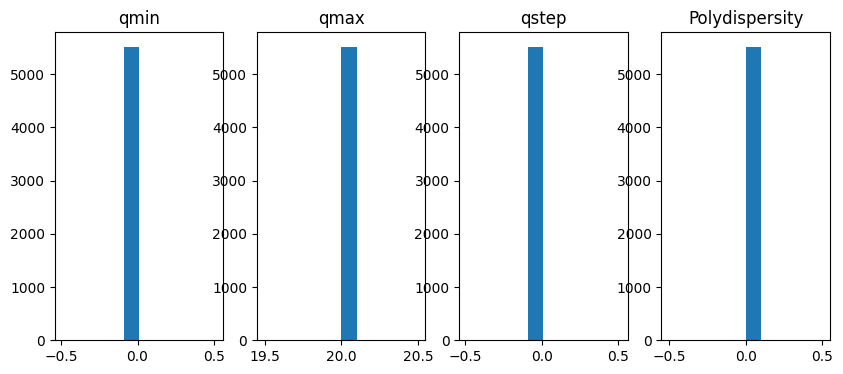

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
plt.hist(data["qmin"])
plt.title("qmin")
plt.subplot(1,4,2)
plt.hist(data["qmax"])
plt.title("qmax")
plt.subplot(1,4,3)
plt.hist(data["qstep"])
plt.title("qstep")
plt.subplot(1,4,4)
plt.hist(data["polydispersity"])
plt.title("Polydispersity")


In [ ]:
data_num=data.drop(["Solid_class","Element","Shape","Size_parameters","q","Intensities","qmin","qmax","qstep","polydispersity"],axis=1)
for j in range(len(data)):
    for i in range(3):
        a=data.loc[j,"Size_parameters"]
        data_num.loc[j,f"Size_parameters_{i+1}"]=int(a[i])

data_num.head()


,Distance,Eq_Radius,n_Atoms,b_iso,Size_parameters_1,Size_parameters_2,Size_parameters_3
0,2.888885,7.076294,63,0.1,2.0,0.0,0.0
1,2.888885,7.076294,63,0.3,2.0,0.0,0.0
2,2.888885,7.076294,63,0.5,2.0,0.0,0.0
3,2.888885,7.076294,63,0.9,2.0,0.0,0.0
4,2.852398,6.986920,63,0.1,2.0,0.0,0.0


Text(0.5, 1.0, 'Element')

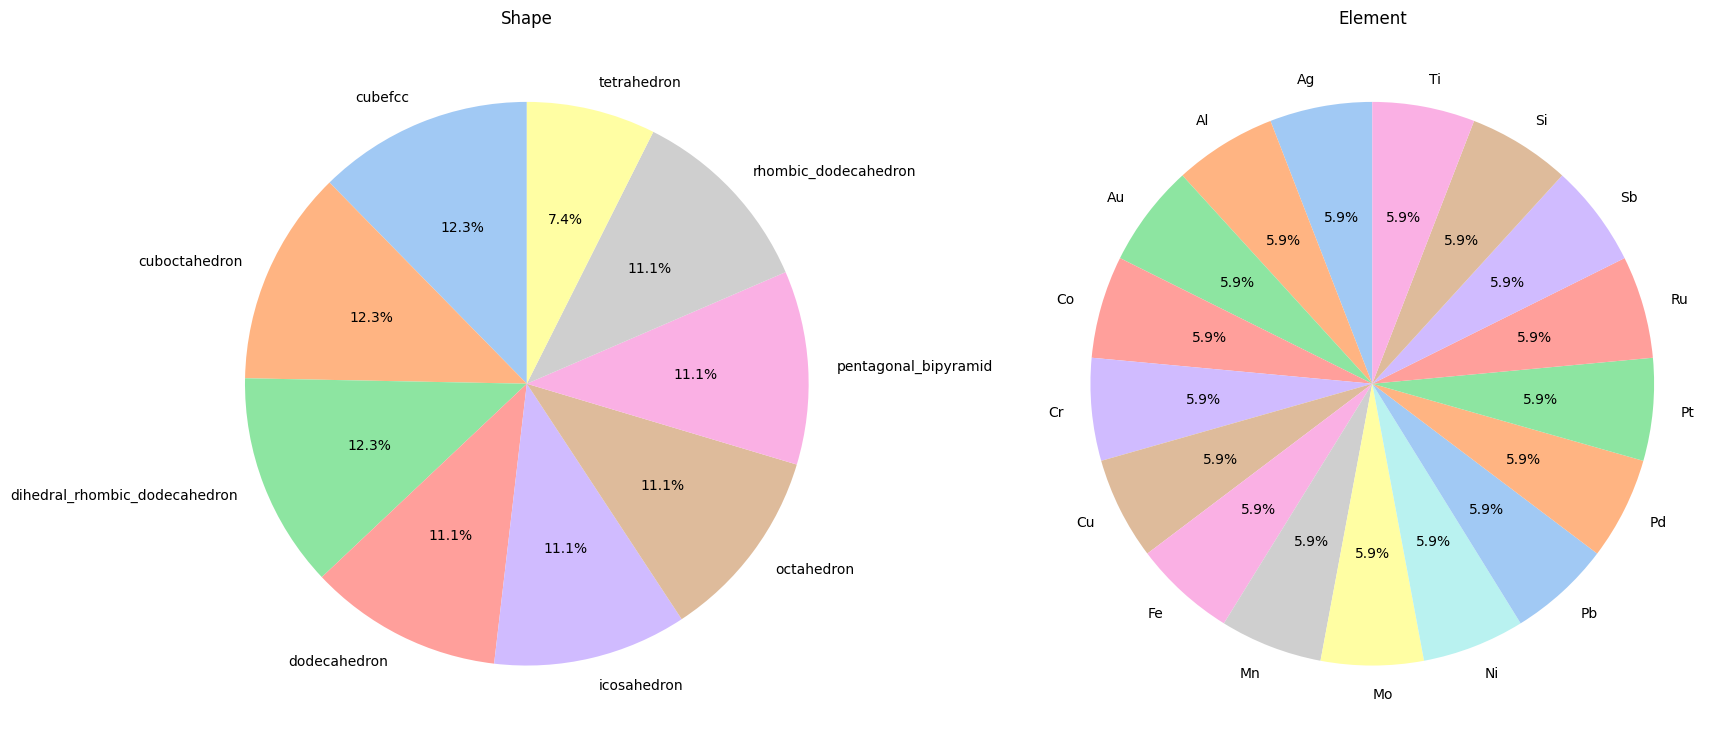

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.pie(data['Shape'].value_counts(),labels=np.unique(data["Shape"]),autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Shape")
plt.subplot(1,2,2)
plt.pie(data['Element'].value_counts(),labels=np.unique(data["Element"]),autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Element")

Text(0.5, 1.0, 'b_iso')

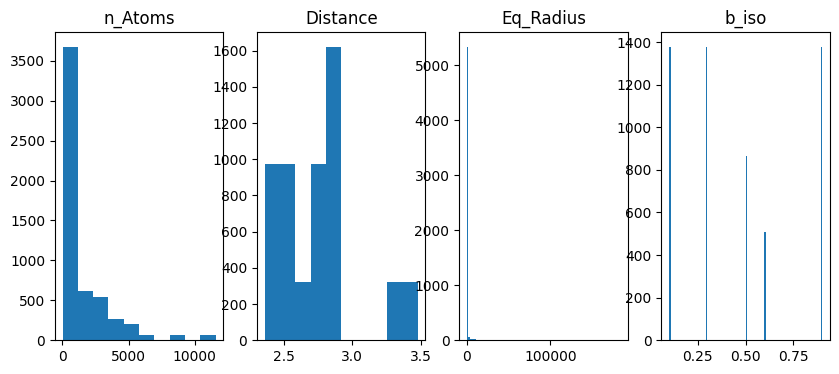

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
plt.hist(data["n_Atoms"])
plt.title("n_Atoms")
plt.subplot(1,4,2)
plt.hist(data["Distance"])
plt.title("Distance")
plt.subplot(1,4,3)
plt.hist(data["Eq_Radius"], bins=100)
plt.title("Eq_Radius")
plt.subplot(1,4,4)
plt.hist(data["b_iso"], bins=100)
plt.title("b_iso")

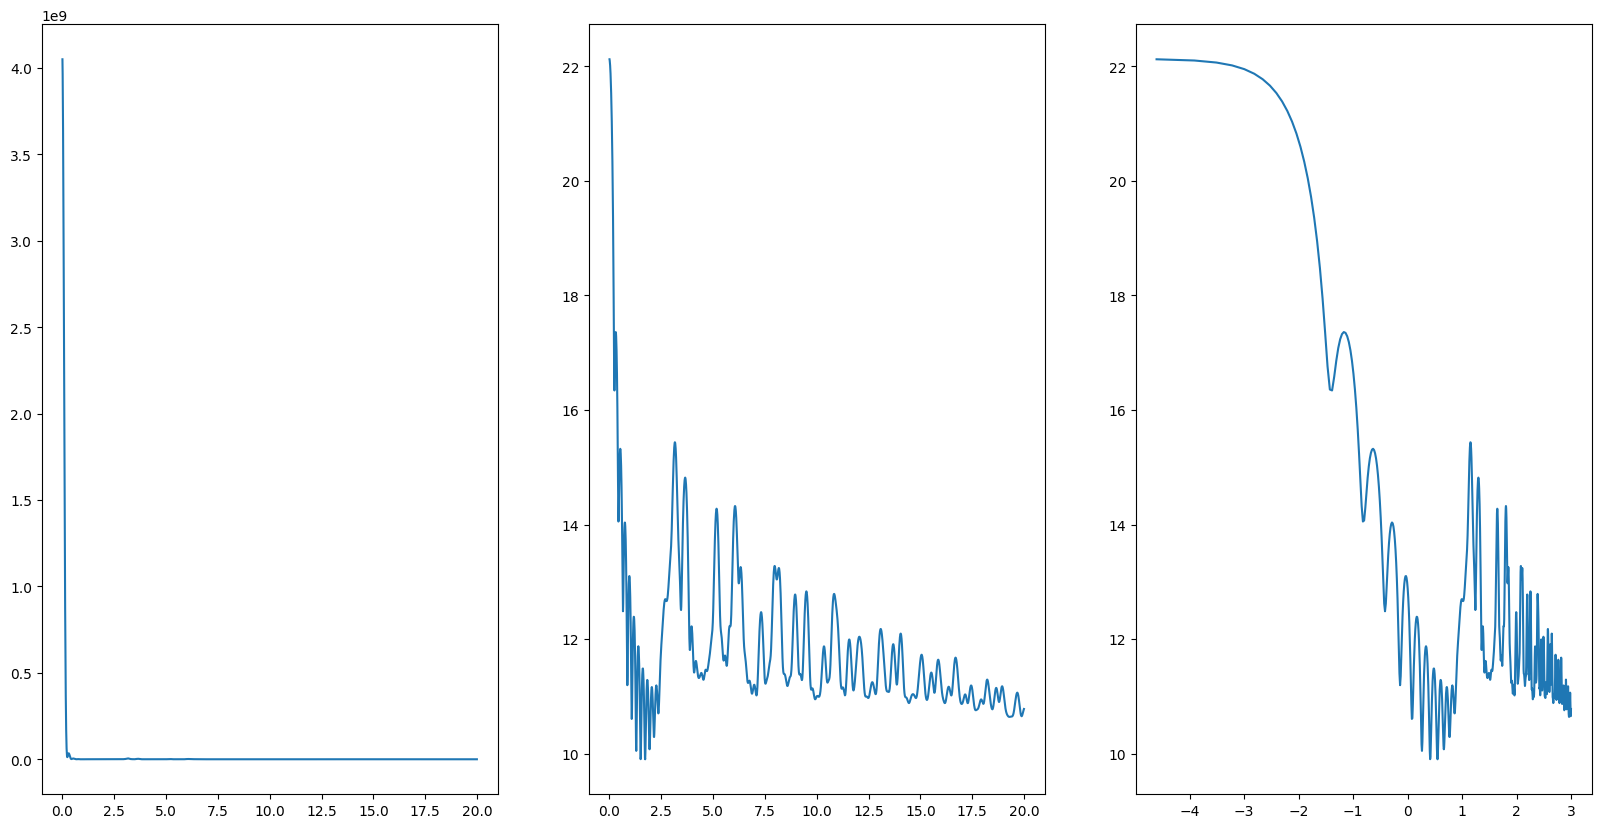

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.plot(data.q[433],data.Intensities[433])
plt.subplot(1,3,2)
plt.plot(data.q[433],np.log(data.Intensities[433]))
plt.subplot(1,3,3)
plt.plot(np.log(data.q[433]),np.log(data.Intensities[433]))
plt.show()

<Axes: >

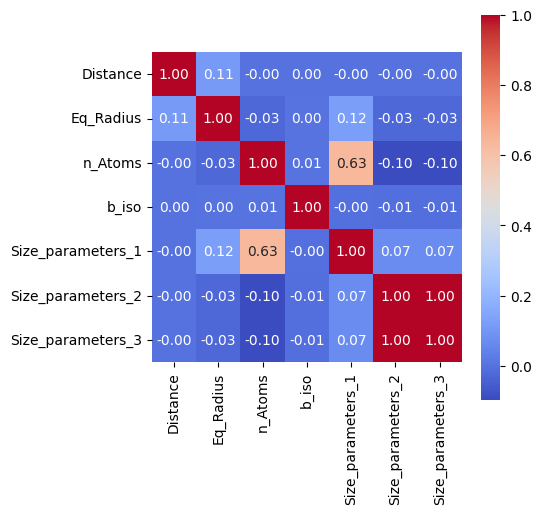

In [ ]:
corr_matrix = data_num.corr()

# Générer la heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)


Variance expliquée par chaque composante: [0.28853016 0.23415829 0.15894473 0.14283943 0.12822484 0.04730255
 0.        ]
Variance expliquée totale: 1.0


Text(0, 0.5, 'explained_variance_ratio')

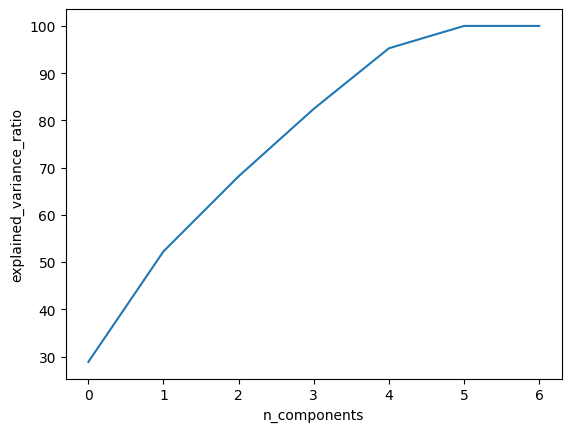

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

# Étape 2 : Appliquer PCA
pca = PCA()  # Remplace 2 par le nombre de composantes souhaité
data_pca = pca.fit_transform(data_scaled)

# Afficher la variance expliquée par chaque composante
print(f'Variance expliquée par chaque composante: {pca.explained_variance_ratio_}')
print(f'Variance expliquée totale: {sum(pca.explained_variance_ratio_)}')

plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("n_components")
plt.ylabel("explained_variance_ratio")


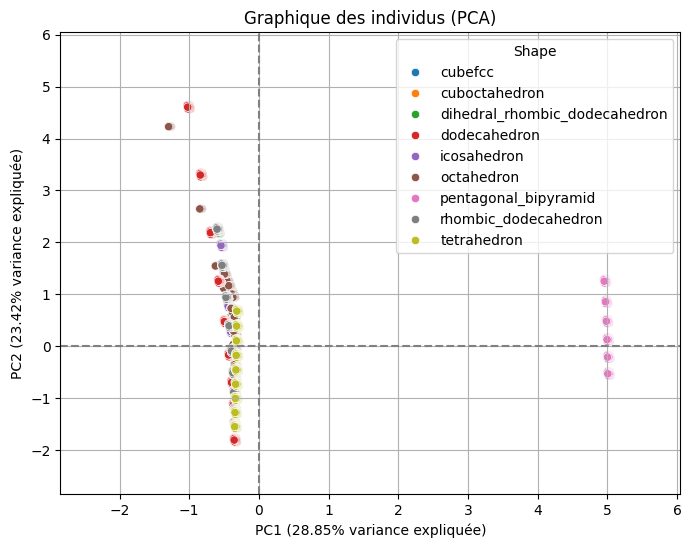

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1],hue=data["Shape"])

#sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1])  # Si labels présents

plt.title("Graphique des individus (PCA)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

# Centrer les axes sur (0, 0) avec les mêmes limites pour X et Y
plt.xlim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)
plt.ylim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)

# Ajouter une ligne pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.grid(True)
plt.show()

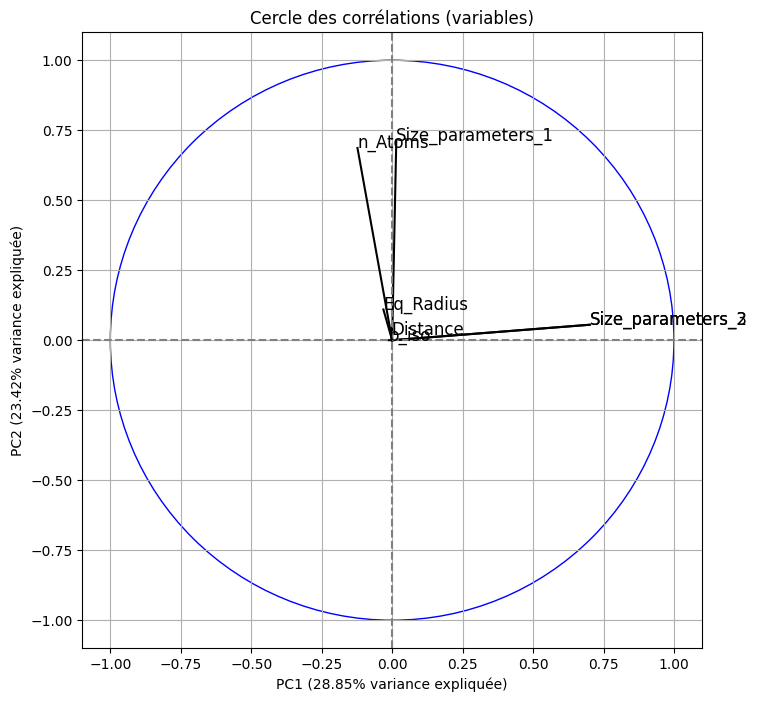

In [ ]:
pcs = pca.components_

plt.figure(figsize=(8, 8))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, data_num.columns[i], fontsize=12)

# Ajouter le cercle des corrélations
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

# Centrer les axes sur (0,0) avec des limites symétriques entre -1 et 1
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Ajouter les lignes pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.title('Cercle des corrélations (variables)')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

plt.grid(True)
plt.show()

In [24]:
data_num2=data.drop(["Solid_class","Element","Shape","Size_parameters","q","Intensities","qmin","qmax","qstep","polydispersity"],axis=1)


for j in range(len(data)):
    for i in range(3):
        a=data.loc[j,"Size_parameters"]
        data_num2.loc[j,f"Size_parameters_{i+1}"]=int(a[i])

for j in range(len(data)):
        a=data.loc[j,"Intensities"]
        for i in range(len(a)):
            data_num2.loc[j,f"Intensities{i+1}"]=a[i]



data_num2.head()


<ipython-input-24-fc67dcbfde8f>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_num2.loc[j,f"Intensities{i+1}"]=a[i]
<ipython-input-24-fc67dcbfde8f>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_num2.loc[j,f"Intensities{i+1}"]=a[i]
<ipython-input-24-fc67dcbfde8f>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use

KeyboardInterrupt: 

In [38]:
cop=data_num2.dropna()
cop

,Distance,Eq_Radius,n_Atoms,b_iso,Size_parameters_1,Size_parameters_2,Size_parameters_3,Intensities1,Intensities2,Intensities3,...,Intensities1990,Intensities1991,Intensities1992,Intensities1993,Intensities1994,Intensities1995,Intensities1996,Intensities1997,Intensities1998,Intensities1999
0,2.888885,7.076294,63,0.1,2.0,0.0,0.0,8.760072e+06,8.737556e+06,8.700139e+06,...,5504.801270,5504.597168,5503.507324,5501.530273,5498.683105,5494.964844,5490.397949,5484.985840,5478.751953,5471.714355
1,2.888885,7.076294,63,0.3,2.0,0.0,0.0,8.760070e+06,8.737548e+06,8.700119e+06,...,5267.766602,5263.145020,5258.204102,5252.941895,5247.367188,5241.477539,5235.287109,5228.791504,5222.004395,5214.934082
2,2.888885,7.076294,63,0.5,2.0,0.0,0.0,8.760067e+06,8.737539e+06,8.700101e+06,...,5180.836426,5174.684570,5168.423340,5162.050293,5155.571289,5148.981934,5142.292969,5135.496582,5128.603027,5121.615234
3,2.888885,7.076294,63,0.9,2.0,0.0,0.0,8.760063e+06,8.737522e+06,8.700062e+06,...,5137.264160,5130.401855,5123.537109,5116.666504,5109.794434,5102.915527,5096.037598,5089.151367,5082.264160,5075.376465
4,2.852398,6.986920,63,0.1,2.0,0.0,0.0,6.700418e+05,6.683341e+05,6.654966e+05,...,124.255180,124.792656,125.320938,125.838524,126.344070,126.835983,127.313080,127.774475,128.219193,128.646286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2.708219,19.901264,1099,0.9,6.0,0.0,0.0,2.326270e+09,2.290541e+09,2.232064e+09,...,69776.304688,69686.695312,69590.281250,69487.289062,69378.179688,69263.812500,69145.117188,69023.335938,68899.703125,68775.718750
328,3.259762,23.954263,1099,0.1,6.0,0.0,0.0,3.118186e+09,3.049054e+09,2.936823e+09,...,131957.750000,128949.054688,126473.078125,124618.171875,123427.640625,122900.718750,122999.585938,123653.093750,124769.242188,126241.250000
329,3.259762,23.954263,1099,0.3,6.0,0.0,0.0,3.118185e+09,3.049051e+09,2.936816e+09,...,126167.429688,124961.500000,123952.781250,123172.945312,122637.257812,122344.593750,122280.476562,122418.234375,122723.859375,123157.992188
330,3.259762,23.954263,1099,0.5,6.0,0.0,0.0,3.118184e+09,3.049048e+09,2.936809e+09,...,124043.890625,123500.585938,123030.351562,122644.523438,122348.570312,122141.664062,122018.351562,121968.554688,121979.773438,122037.484375


Text(0, 0.5, 'explained_variance_ratio')

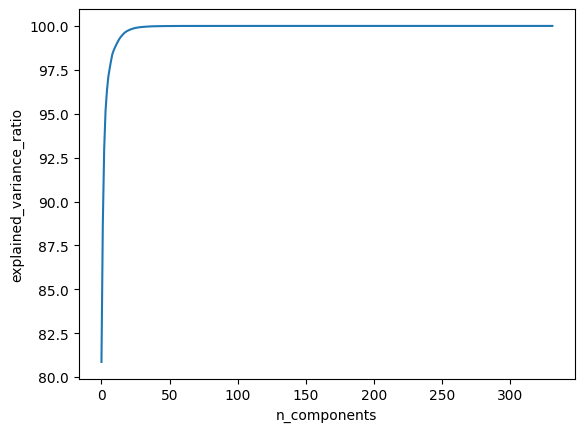

In [41]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cop)

# Étape 2 : Appliquer PCA
pca = PCA()  # Remplace 2 par le nombre de composantes souhaité
data_pca = pca.fit_transform(data_scaled)

# Afficher la variance expliquée par chaque composante
# print(f'Variance expliquée par chaque composante: {pca.explained_variance_ratio_}')
# print(f'Variance expliquée totale: {sum(pca.explained_variance_ratio_)}')

plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("n_components")
plt.ylabel("explained_variance_ratio")

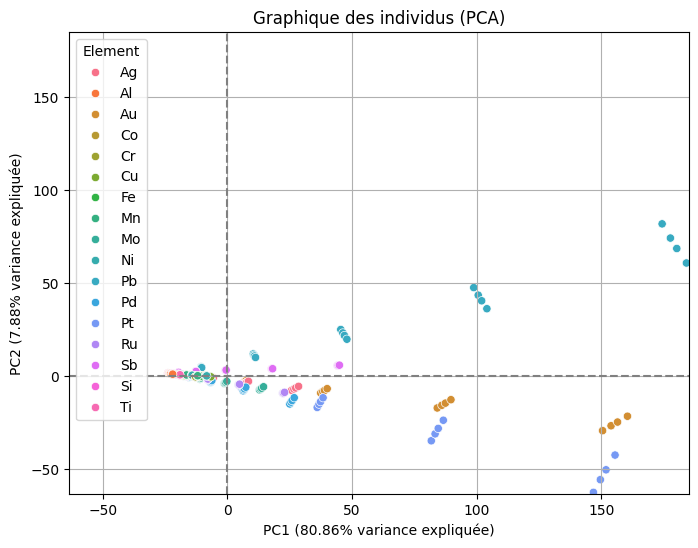

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1],hue=data.loc[:len(cop)-1,"Element"])

#sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1])  # Si labels présents

plt.title("Graphique des individus (PCA)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

# Centrer les axes sur (0, 0) avec les mêmes limites pour X et Y
plt.xlim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)
plt.ylim(min(data_pca[:, 0].min(), data_pca[:, 1].min()) - 1, max(data_pca[:, 0].max(), data_pca[:, 1].max()) + 1)

# Ajouter une ligne pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.grid(True)
plt.show()

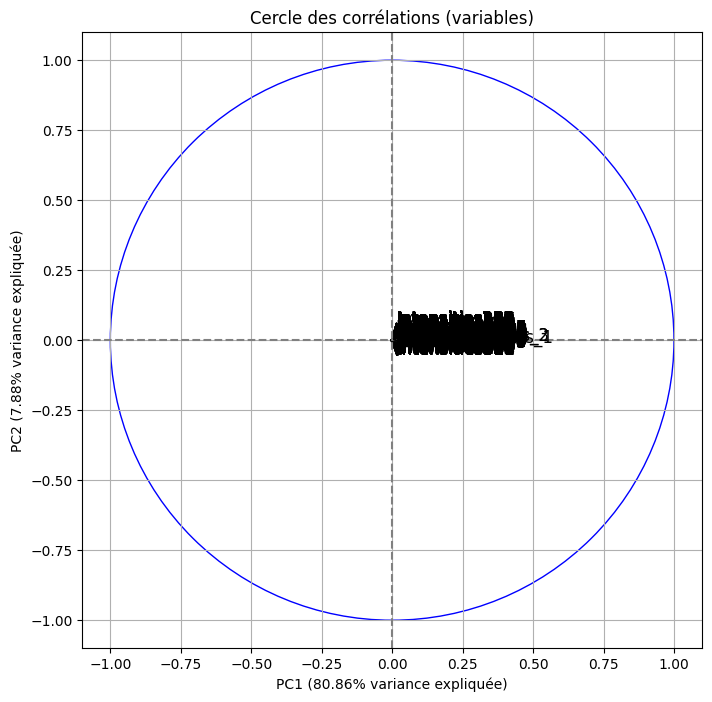

In [48]:
pcs = pca.components_

plt.figure(figsize=(8, 8))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, cop.columns[i], fontsize=12)

# Ajouter le cercle des corrélations
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

# Centrer les axes sur (0,0) avec des limites symétriques entre -1 et 1
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Ajouter les lignes pour les axes
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')

plt.title('Cercle des corrélations (variables)')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)")

plt.grid(True)
plt.show()

In [ ]:
# q_step, q_min, q_max, polydispersity --> inutiles
# n_atoms Eq_radius --> eventuellement transformation logarithmique si modèle linéaire
# b_iso -->  que represente cette variable ??
# distance --> == size ??
# Size_parameters --> explications sur les 3 composantes ??

# Solid_class, Element, Shape ,Size_parameters, b_iso ---> variables qualitatives
# Distance, Eq_Radius, n_Atoms ---> variables quantitatives
# q, Intensities ---> tableaux numpy (size = 1999), tracé de l'intensité en fonction de q

# size with SAXS and shape with WAXS, les deux avec SWAXS size = première partie de la courbe et shape = deuxième partie de la courbe ??